First of all, a few notes:
* Check the first homework for a quick reminder on general rules.
* As before, no code hints. We trust your skills (if in doubt - check the seminar notebook).

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

# Introduction [1.0]




## scRNA-seq

We **must** know our data before doing the analysis. To ease your life, [here](https://www.singlecellcourse.org/introduction-to-single-cell-rna-seq.html) is an excellent state-of-the-art description of the scRNA-seq experiments. Read it and answer the following questions:

* [0.2] What is single-cell RNA-seq and how does it compare to bulk RNA-seq?

→
RNA-seq is a technology that enables the extraction of the transcriptome from a single cell, as opposed to bulk RNA-seq, which involves sequencing a population of cells. ScRNA-seq provide information about certain cell transcriptome, it's logically more specific data, which we can compare between each other, in order to investigate differencies. But using bulk RNA-seq we can also compare gene expression in cells, but on more high level: comparing populations of cells. For example, we can analyze oncogenically-transformed cells alongside perifocal intact cells to investigate differences in gene expression. And it's important to note that bulk sequencing provide the average expression level for each gene across a population of cells, it's one of the important distinction from scRNA-seq.

* [0.2] What are some of the typical applications of scRNA-seq?

→
If we talk about studying comples tissues, such as brain, where each cell can express different sets of genes - bulk sequencing is not sufficient. Unlike with the bulk approach, with scRNA-seq we can estimate a distribution of expression levels for each gene across a population of cells. Using scRNA-seq, we can obtain specific gene expression information about individual cells and compare it with others, such as wildtype/mutant samples, treated/untreated samples, etc.

* [0.2] What experimental design choices should be considered in scRNA-seq?

→
The three most widely used options are microtitre-plate-based, microfluidic-array-based and microfluidic-droplet-based methods.
The most suitable platform depends on the biological question at hand. For example, if one is interested in characterizing the composition of a heterogeneous tissue, then a droplet-based method is more appropriate, as it allows a very large number of cells to be captured in a mostly unbiased manner. On the other hand, if one is interested in characterizing a specific cell-population for which there is a known surface marker, then it is probably best to enrich using FACS and then sequence a smaller number of cells at higher sequencing depth

* [0.2] What are some of the challenges of scRNA-seq data compared to bulk data?

→
As i wrote above the main different between scRNA-seq and bulk RNA-seq is that in first case we will obtain gene expression levels from single cell, opposite to bulk sequencing where we will do the same but for population of cells. Another issue in scRNA-seq is that we have low amount of information, which results in very sparse data, where lot of genes can be unexpressed. There are two group of reasons: first - it's real unexpressed genes, second - the gene was expressed but we were unable to detect it. It's can be reason of cell-to-cell variation that is not always biological (a gene is detected in one cell but absent from another). Another issue is batch effects. These can be observed even when sequencing the same material using different technologies, and if not properly normalised, can lead to incorrect conclusions.

## Target experiment

To move on, you need to find/choose and download your favorite scRNA-seq dataset. Similar to what we did during the workshop, but everyone will have their own data to make it more fun.

See, for example, public [10x datasets](https://www.10xgenomics.com/resources/datasets?menu%5Bproducts.name%5D=Single%20Cell%20Gene%20Expression&query=&page=1&configure%5Bfacets%5D%5B0%5D=chemistryVersionAndThroughput&configure%5Bfacets%5D%5B1%5D=pipeline.version&configure%5BhitsPerPage%5D=50&configure%5BmaxValuesPerFacet%5D=1000&refinementList%5Bproduct.name%5D%5B0%5D=Single%20Cell%20Gene%20Expression) or [GEO](https://www.ncbi.nlm.nih.gov/gds/?term=scRNA-seq). Subsample cells or use more strict thresholds if the computations are too long.

[0.2] Please provide a brief description of the chosen dataset. I.e., what was the purpose of the original study, what is the protocol, and so on. Insert link to the dataset.

**Note**: To avoid a situation where multiple students have selected the same dataset, write the name of the dataset and attach a link to it in [this google sheet](https://docs.google.com/spreadsheets/d/1iJ0SJyYbmq38AIBNg723iyRE-aYfO0SfujpEw2hm3kg/edit?usp=sharing). This is not mandatory, and is only needed to ensure that some other student will not accidentaly pick the same dataset.

→
I prefered 10k Human PBMCs
https://www.10xgenomics.com/resources/datasets/10k-human-pbmcs-3-ht-v3-1-chromium-x-3-1-high

Honestly i wanted to work with glioblastoma dataset, or smth related to oncology. But it was great challenge for me to search appropriate data.


# Main flow [7.5]

Simple and tedious, you need to repeat the seminar results with your data and implement some algorithms by hand.

* [2.5] Repeat the main workflow: load & preprocess the data -> calculate PCA, UMAP, t-SNE -> color cells using K-means / Agg. Clustering / Leiden algorithms.

* [1.5] Make several plots showing how the representation of data is changing for UMAP & t-SNE by tweaking parameters of those algorithms. For the representation of your choice, find optimal number of clusters by tweaking `n_clusters` in K-means and `resolution` in Leiden algorithm. What was the optimal number of clusters for your dataset? Justify your choice.

* [1] Analyze your clusters and identify if any of them is an outlier in terms of technical scRNA characteristics, such as: number of genes per cell, percentage of mitochondrial expression. Make relevant visualizations.

* [1] Visualize `10` top expressed genes in each cluster. To do this, make use of:
1. `sc.tl.rank_genes_groups` to rank genes for characterizing groups (cluster labels).
2. `sc.pl.rank_genes_groups` to plot ranking of genes for each cluster.
3. `sc.pl.rank_genes_groups_heatmap` to plot ranking of genes using heatmap plot.\
Instead of the heatmap, you might want to use some other visualization that you find most fitting. You can use [this tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html) to find more info about scanpy plotting functions.

* [1.5] Do one of the following:
  * Either provide formal algorithm and implementation of K-means with random initialization by hand, describe results, and compare them to the sklearn implementation.
  * Or do the same for PCA.\
    *Note that completing both assignments does NOT result in [3.0] points.*

In [199]:
# Download and unpack data
!wget https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_PBMC_3p_nextgem_Chromium_X/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz
!tar -xzf 10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz

--2023-12-11 11:18:41--  https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_PBMC_3p_nextgem_Chromium_X/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104004033 (99M) [application/x-tar]
Saving to: ‘10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz.3’

10k_PBMC_3p_nextgem 100%[===================>]  99.19M   207MB/s    in 0.5s    

2023-12-11 11:18:42 (207 MB/s) - ‘10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.tar.gz.3’ saved [104004033/104004033]



In [200]:
# ok, do the same things like in seminar, download scanpy and appropriate version of matplotlib
!python3 -m pip uninstall -y matplotlib
!python3 -m pip install matplotlib==3.6.3 scanpy

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Successfully uninstalled matplotlib-3.6.3
  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [201]:
# импортим дату
import pandas as pd
import scanpy as sc

# устанавливаем уровни детализации сообщений от scanpy: 3-й уровень соответствует подсказкам
sc.settings.verbosity = 3

# sc.read_10x_mtx - функция пакета сканпай для чтения mtx файлов
adata = sc.read_10x_mtx(
    'filtered_feature_bc_matrix',  # директория где такой файлл находится
    var_names='gene_symbols',      # использование название генов как имен переменных
    cache=True                     # кешируем, типа что бы быстрее доступ к данным был
)
# этот кусок кода делает все переменные уникальными (гены не должны повторяться)
adata.var_names_make_unique()

adata

... reading from cache file cache/filtered_feature_bc_matrix-matrix.h5ad


/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 11996 × 36601
    var: 'gene_ids', 'feature_types'

In [202]:
print(adata.obs.columns)

Index([], dtype='object')


In [203]:
# Эта функция нужна для добавления метрик контроля качества что бы потом изобразить их ниже (n_genes_by_count and total_counts)
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
# adata - наш anndata файл
# percent_top=None - процент верхних генов для которых будет применятся измерение качества (None - значит все гены будут учавствовать)
# log1p=False - к метрикам не будет применен логарифм
# inplace=True - изменения будут сразу проведены в самом файле adata, а не в копии

In [204]:
# добавляем среднее значение экспрессии по всем генам в каждой клетке. Может предоставить информацию о среднем уровне экспрессии клетки
adata.obs['mean_counts'] = adata.X.mean(axis=1)

In [205]:
adata.obs['mean_counts']

AAACCCAAGGCCCAAA-1    0.331775
AAACCCAAGTAATACG-1    0.213413
AAACCCAAGTCACACT-1    0.266146
AAACCCACAAAGCGTG-1    0.151936
AAACCCACAATCGAAA-1    0.202156
                        ...   
TTTGTTGGTTGGATCT-1    0.169368
TTTGTTGGTTTCTTAC-1    0.127263
TTTGTTGTCCATTTCA-1    0.138220
TTTGTTGTCTACACAG-1    0.137619
TTTGTTGTCTCATTAC-1    0.233223
Name: mean_counts, Length: 11996, dtype: float32

In [206]:
mask = adata.var_names.str.startswith('MT-') # создаем бинарный массив, методом поиска префикса MT- у названия генов (мы помним что мы используем названия генов как название переменных, и все они уникальны)
print(f"Mito genes: {adata.var_names[mask].tolist()}") # печатаем че там вышло

adata.var['mt'] = mask # Добавляем информацию о том, является ли ген митохондриальным, в объект adata.var

Mito genes: ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


In [207]:
# Далее добавляем в obs информацию о митохондриальных генах
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

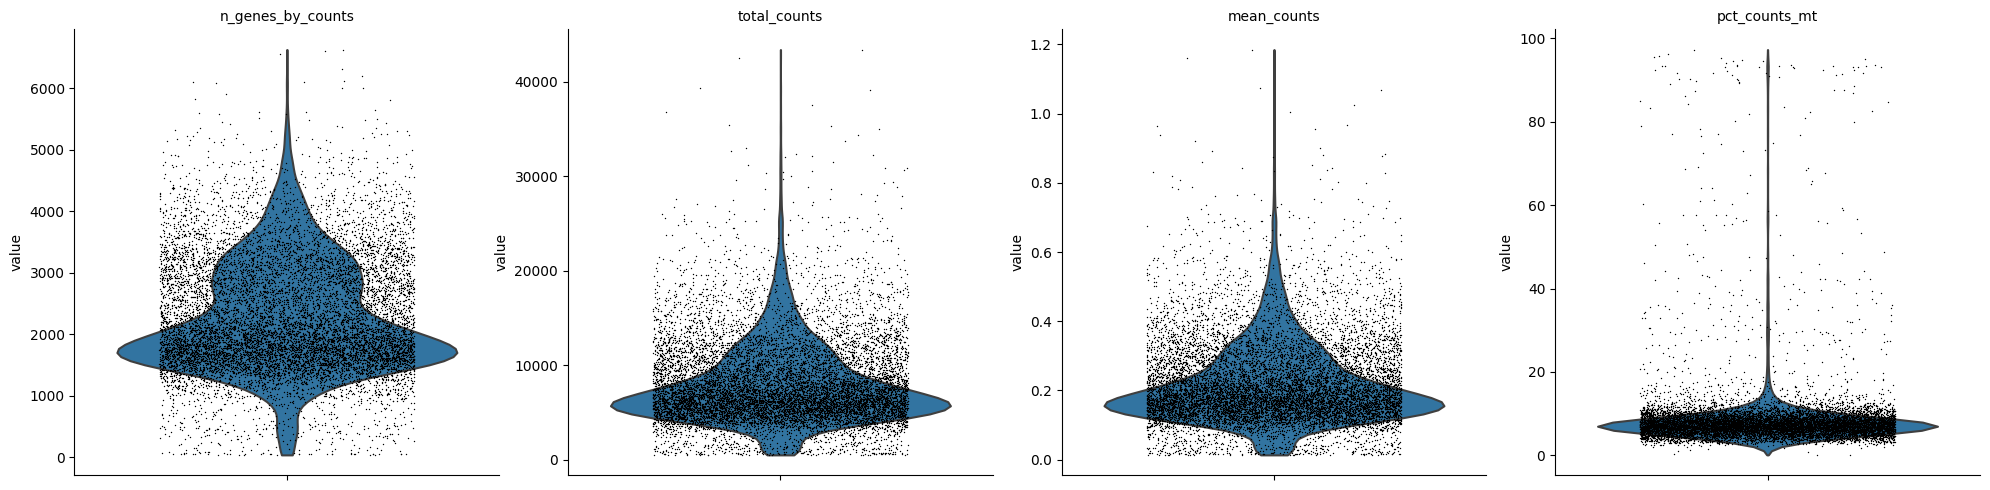

In [208]:
# sc.pl.violin - функция рисующая скрипочные (ппохожие на скрипку - violin) картинки
# adata - данные
# [['n_genes_by_counts', 'total_counts', 'mean_counts', 'pct_counts_mt'] - набор параметров которые мы будем визуализировать
# n_genes_by_count - количество генов, обнаруженных в каждой клетке на основе их экспрессии
# total_counts - общее количество обнаруженных молекул мРНК в каждой клетке
# mean_counts -  среднее значение экспрессии по всем генам в каждой клетке
# pct_counts_mt - процент генов относящихся к митохондриальных
# jitter=0.3 - этот параметр добавляет случайный шум для лучшей визуализации.
# multi_panel=True - графики для разных метрик следует размещать на нескольких панелях.
sc.pl.violin(
    adata, ['n_genes_by_counts', 'total_counts', 'mean_counts', 'pct_counts_mt'],
    jitter=0.3, multi_panel=True
)

# Так ну надо фильтровать данные: убираем низкоэкспрессируемые гены: судя по n_genes_by_count я бы тоже отрезал снизу по 1000, как в семинаре. По митохондриальным генам видно, что клеток где более 20 процентов генов - МТ многовато(((, надо будет убирать

In [209]:
# Warning! Very harsh thresholds to keep comp. time small
sc.pp.filter_cells(adata, min_genes=1000) # Эта функция удаляет клетки с числом обнаруженных генов меньше 1000
# Это может быть основано на предположении, что клетки с очень низким числом обнаруженных генов могут представлять собой шум или пустые капли, и их следует удалить из анализа.
sc.pp.filter_genes(adata, min_cells=100) # Эта функция удаляет гены, которые обнаружены в менее чем 100 клетках
adata

filtered out 480 cells that have less than 1000 genes expressed
filtered out 23659 genes that are detected in less than 100 cells


AnnData object with n_obs × n_vars = 11516 × 12942
    obs: 'n_genes_by_counts', 'total_counts', 'mean_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

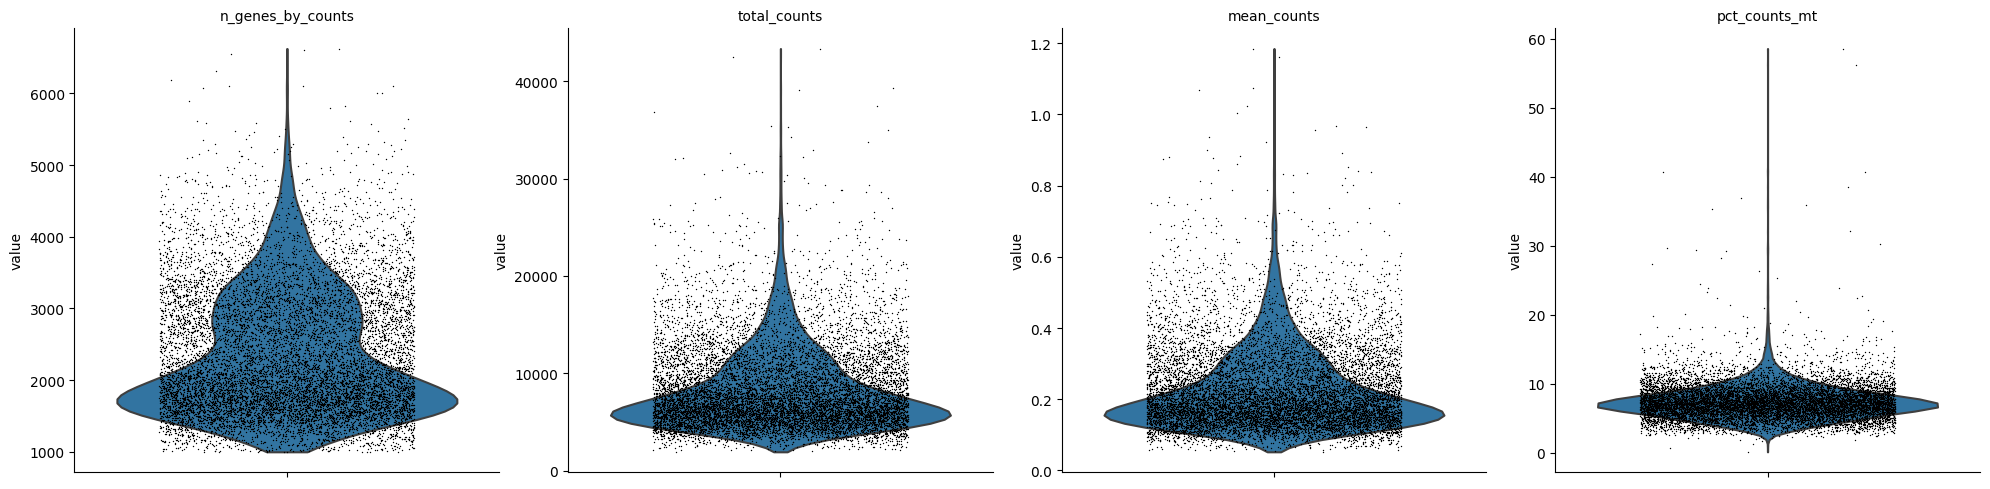

In [210]:
# смотрим еще раз:
sc.pl.violin(
    adata, ['n_genes_by_counts', 'total_counts', 'mean_counts', 'pct_counts_mt'],
    jitter=0.3, multi_panel=True
)

# Кстати даже клеток с преимущественной экспрессией митохондриальных генов меньше стало. Ладно, мы удалили клетки с маленьких числом экспрессируемых генов, и удалили гены которые мало где встречаются. Теперь надо отфильтровать оверэкспрессивные гены и клетки где преимущественно экспрессируются митохондриальные гены

In [211]:
adata = adata[adata.obs.n_genes_by_counts < 4_500, :] # удаляем гены которые обнаружены более чем в 4500 клетках
adata = adata[adata.obs.total_counts < 20_000, :] # насколько я понял тут мы удаляем клетки где найдено более 20 к мРНК?
adata = adata[adata.obs.pct_counts_mt < 15, :] # ну тут понятно
adata

View of AnnData object with n_obs × n_vars = 11153 × 12942
    obs: 'n_genes_by_counts', 'total_counts', 'mean_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

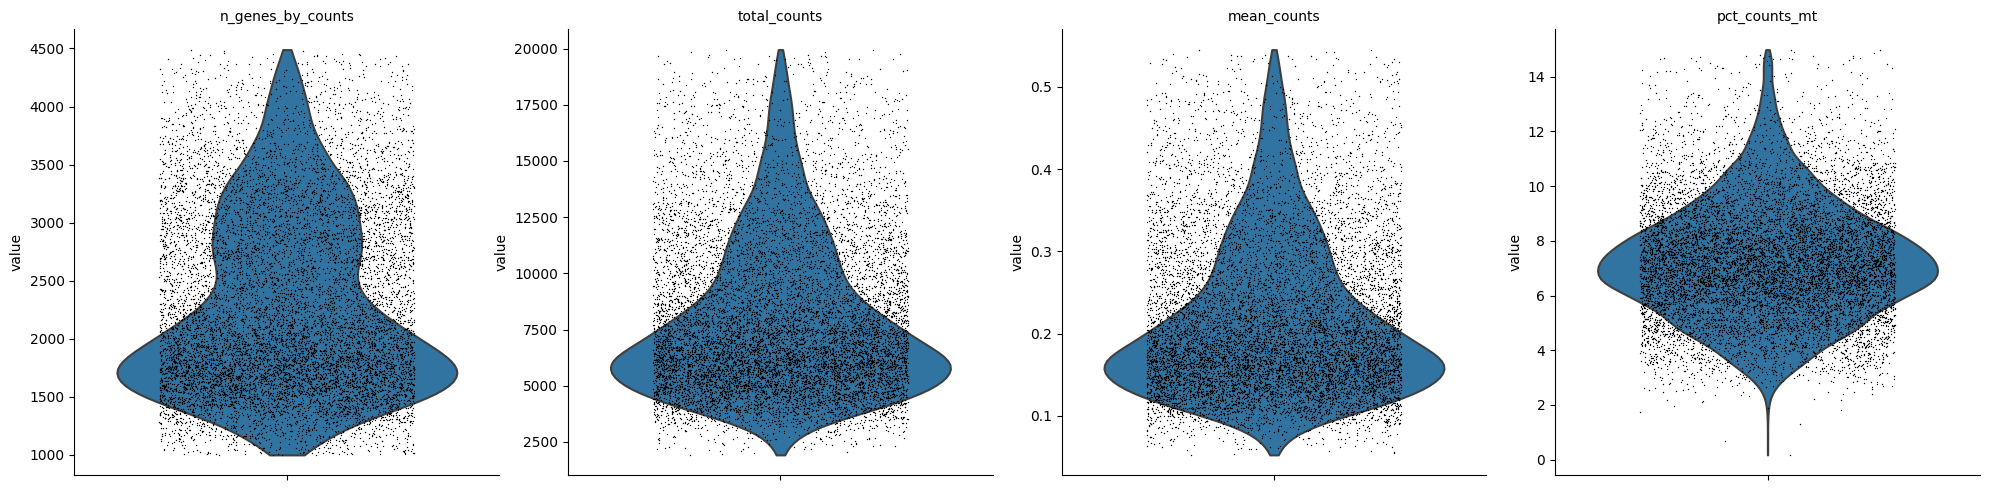

In [212]:
# смотрим еще раз:
sc.pl.violin(
    adata, ['n_genes_by_counts', 'total_counts', 'mean_counts', 'pct_counts_mt'],
    jitter=0.3, multi_panel=True
)

# НУ КАКАЯ КРАСОТА ТО А. Теперь приступаем к нормализации данных:

In [213]:
# Normalize the data to CPM & take the log
sc.pp.normalize_total(adata, target_sum=1e6)
# нормализуем к числу молекул на клетку. Здесь параметр target_sum устанавливается в 1 миллион (1e6), что означает, что общая сумма молекул в каждой клетке будет нормализована к значению 1 миллион
sc.pp.log1p(adata)
# Применение логарифмической функции ко всем значениям данных. Обычно используется для стабилизации дисперсии и снижения влияния выбросов

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [214]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=7, min_disp=0.5)
# эта функция выделения генов с высокой вариабельностью экспрессии между клетками
# min_mean=0.0125 - минимальное среднее значение экспрессии гена, чтобы его рассматривать как потенциально высоковариабельный. Гены с низким средним значением могут быть исключены
# max_mean=7 - наоборот, максимальное
# min_disp=0.5 - ну и минимальная дисперсия

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


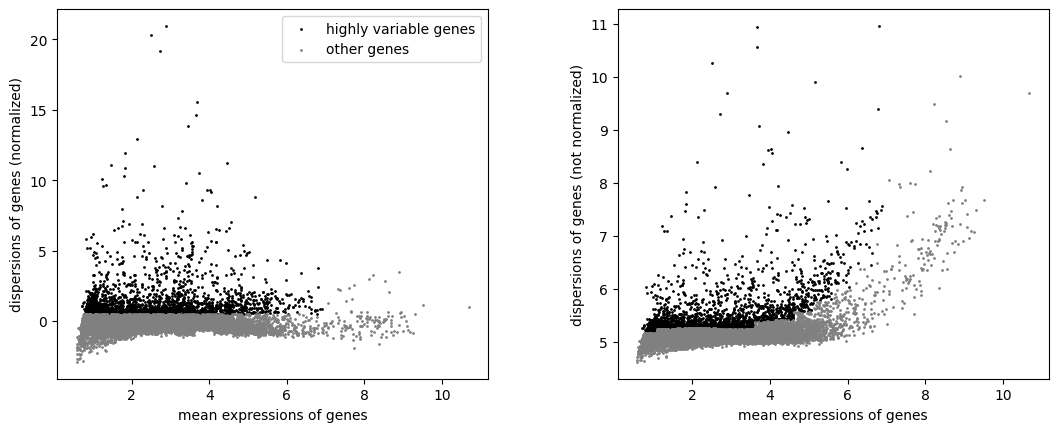

In [215]:
sc.pl.highly_variable_genes(adata)
#это функция используется для визуализации результатов выделения высоковариабельных генов.

In [216]:
adata = adata[:, adata.var.highly_variable] # тут мы оставляем только те гены которые являются высоковариабельными, то есть убираем гены "домашнего хозяйства"

In [217]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])№

# Теперь стандартизация: с помощью ф-ии sc.pp.scale мы маштабируем данные с максимальным значением в 10

In [218]:
sc.pp.scale(adata, max_value=10) # clip values > 10

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [219]:
import numpy as np
# Subsample to speed up the analysis
ind = np.random.choice(np.arange(len(adata.X)), 2_000)

X = adata.X[ind].copy()
print(f"Cells vs Genes: {X.shape}")

Cells vs Genes: (2000, 1892)


In [220]:
from sklearn.manifold import Isomap, MDS, TSNE, SpectralEmbedding, LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Считаем t-SNE / PCA
embeddings = {
    "t-SNE 1": TSNE(n_components=2, init='pca', learning_rate=1000, random_state=42),
    "t-SNE 3": TSNE(n_components=2, init='pca', learning_rate=1500, random_state=42),
    "t-SNE 2": TSNE(n_components=2, init='random', learning_rate=1000, random_state=42),
    "t-SNE 4": TSNE(n_components=2, init='random', learning_rate=1500, random_state=42),
    "PCA 1": PCA(n_components=2, svd_solver='auto'),
    "PCA 2": PCA(n_components=2, svd_solver='full'),
    "PCA 3": PCA(n_components=2, svd_solver='arpack'),
    "PCA 4": PCA(n_components=2, svd_solver='randomized')
}

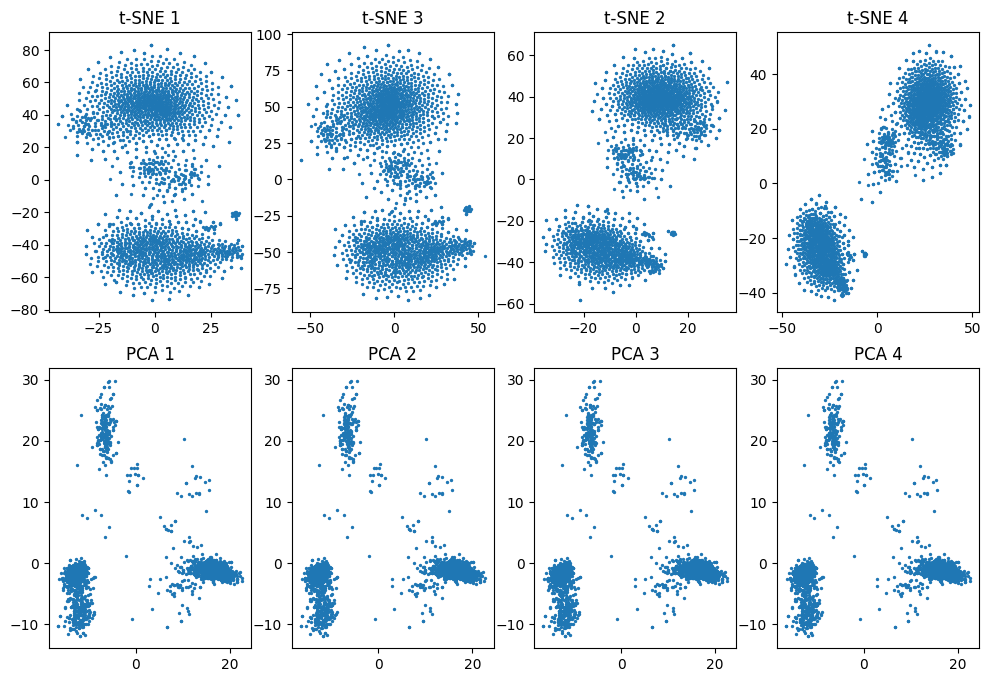

In [221]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.ravel()

assert len(axes) == len(embeddings)

for ax, (name, model) in zip(axes, embeddings.items()):
  ax.set_title(name)
  transformed = model.fit_transform(X)
  ax.scatter(transformed[:, 0], transformed[:, 1], s=2)

# PCA'шки вообще одинаковые получились -> svd_solver можно не менять. Я так же пробовал тюнить whiten, tol, iterated_power, n_oversamples и power_iteration_normalizer - результат тупо один и тотже. Среди РСА'шек мне кажется номер 3 самый приятный, 5 четких кластеров я вижу
# Вот t-SNE потюнить имеет смысл

In [222]:
embeddings = {
    "t-SNE 1": TSNE(n_components=2, init='pca', perplexity=5, random_state=42),
    "t-SNE 2": TSNE(n_components=2, init='pca', perplexity=15, random_state=42),
    "t-SNE 3": TSNE(n_components=2, init='pca', perplexity=30, random_state=42),
    "t-SNE 4": TSNE(n_components=2, init='pca', perplexity=50, random_state=42),
}

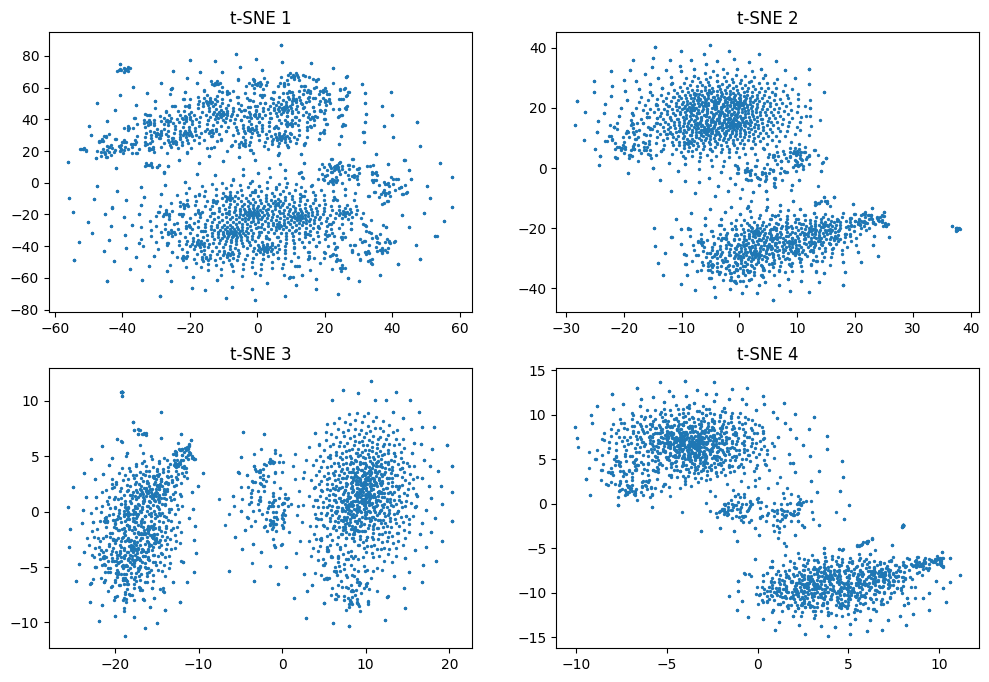

In [223]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

assert len(axes) == len(embeddings)

for ax, (name, model) in zip(axes, embeddings.items()):
  ax.set_title(name)
  transformed = model.fit_transform(X)
  ax.scatter(transformed[:, 0], transformed[:, 1], s=2)

# Тут первый вариант симпатично выглядит, будто бы много кластеров мелких вижу

In [224]:
embeddings = {
    "t-SNE 1": TSNE(n_components=2, init='random', perplexity=5, random_state=42),
    "t-SNE 2": TSNE(n_components=2, init='random', perplexity=15, random_state=42),
    "t-SNE 3": TSNE(n_components=2, init='random', perplexity=30, random_state=42),
    "t-SNE 4": TSNE(n_components=2, init='random', perplexity=50, random_state=42),
}

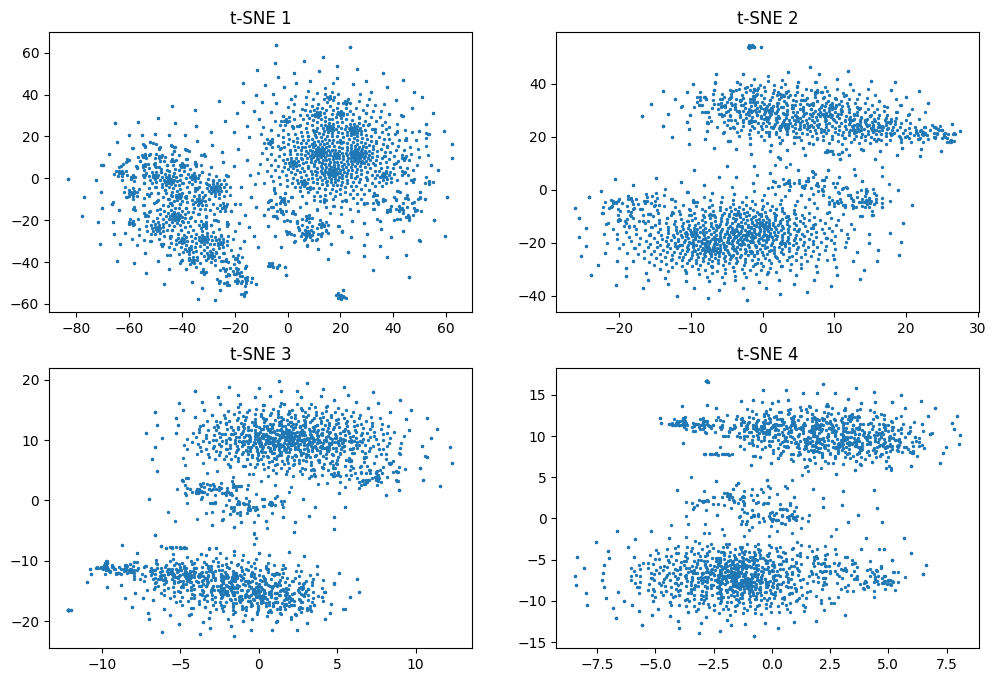

In [225]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

assert len(axes) == len(embeddings)

for ax, (name, model) in zip(axes, embeddings.items()):
  ax.set_title(name)
  transformed = model.fit_transform(X)
  ax.scatter(transformed[:, 0], transformed[:, 1], s=2)

In [226]:
embeddings = {
    "t-SNE 1": TSNE(n_components=2, init='pca', method='barnes_hut', random_state=42),
    "t-SNE 2": TSNE(n_components=2, init='pca', method='exact', random_state=42),
    "t-SNE 3": TSNE(n_components=2, init='random', method='barnes_hut', random_state=42),
    "t-SNE 4": TSNE(n_components=2, init='random', method='exact',random_state=42),
}

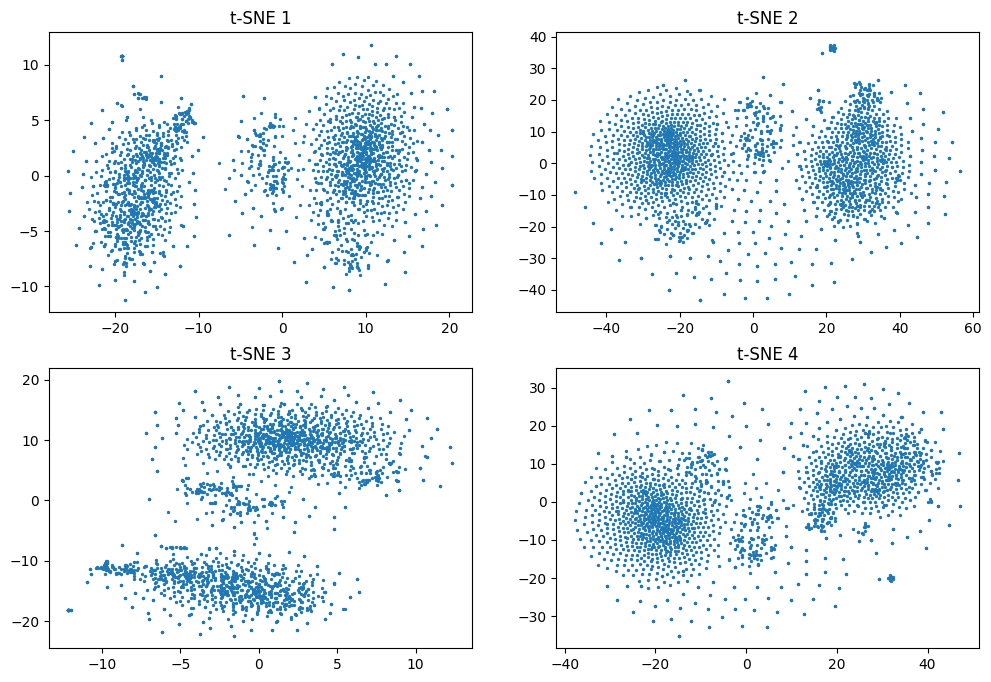

In [227]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

assert len(axes) == len(embeddings)

for ax, (name, model) in zip(axes, embeddings.items()):
  ax.set_title(name)
  transformed = model.fit_transform(X)
  ax.scatter(transformed[:, 0], transformed[:, 1], s=2)

In [266]:
# Сначала дефолтный UMAP
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


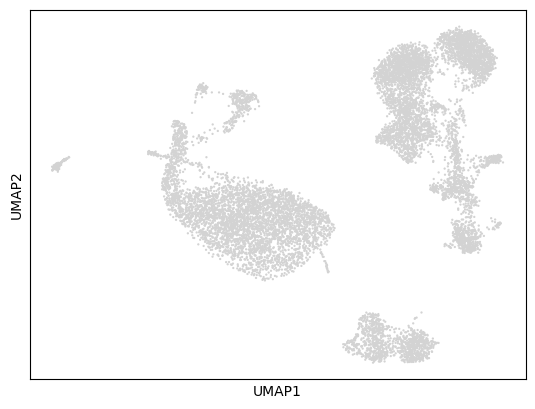

In [267]:
sc.pl.umap(adata)

# ХМ, UMAP выглядит кажется круче чем остальное все

# что можно потюнить в UMAP: n_neighbors
## n_neighbors - дефолтное значение 15 (Количество соседей, используемых при построении графа соседей)
## min_dist - дефолт 0.5 (минимальное расстояние между точками в низкоразмерном пространстве)
## spread: Насколько далеко "распределены" точки в UMAP-пространстве. По умолчанию: 1.0.
## metric: Метрика расстояния, используемая для измерения сходства. По умолчанию: 'euclidean'.
## init_pos: Начальное положение точек в низкоразмерном пространстве. По умолчанию: 'spectral'.  
## random_state: Семя для управления случайными состояниями. По умолчанию: 0.  

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


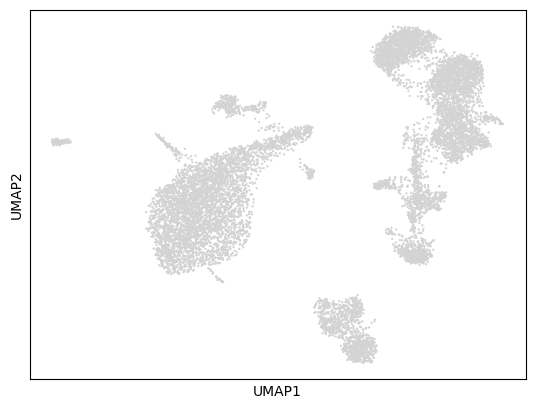

In [268]:
# Теперь не дофольные:
sc.pp.neighbors(adata, n_neighbors=20)
sc.tl.umap(adata)
sc.pl.umap(adata)

# с 20 соседями получилось похуже как мне кажется

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


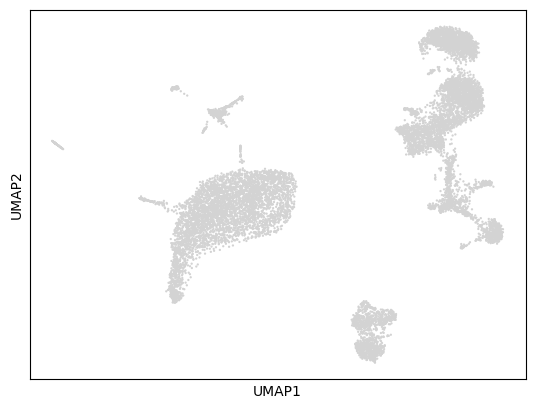

In [269]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.3)
sc.pl.umap(adata)

# тоже не вижу улучшений

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


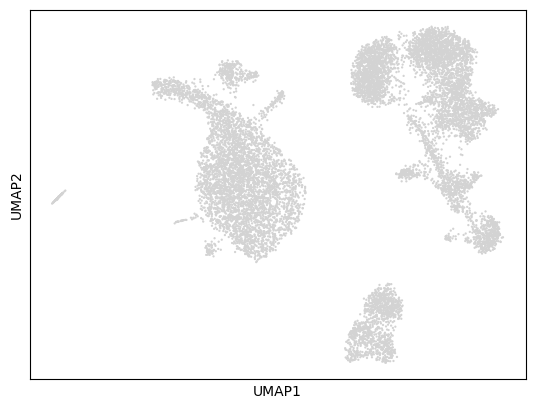

In [270]:
sc.pp.neighbors(adata, metric='manhattan')
sc.tl.umap(adata)
sc.pl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


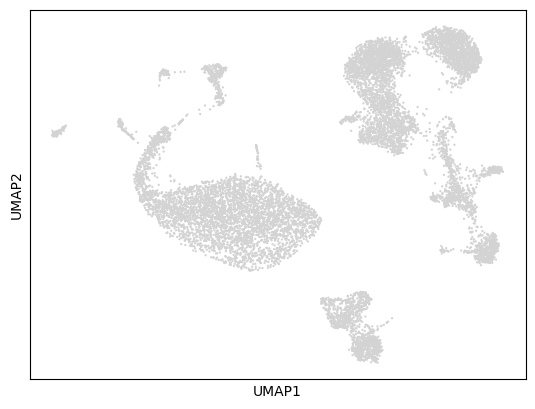

In [271]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, spread=2)
sc.pl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


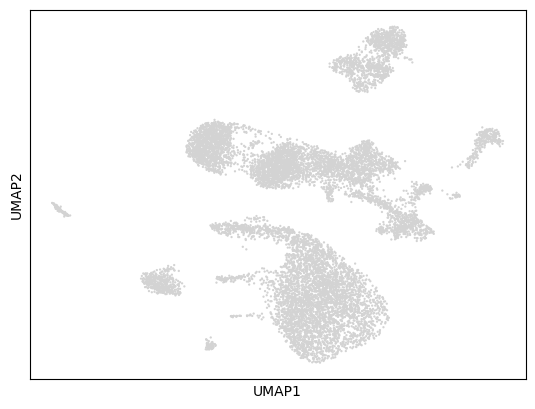

In [272]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, init_pos='random') # ну рандом мы использовать не будем
sc.pl.umap(adata)

# Clustering

In [273]:
# Subsample to speed up the analysis
sample = sc.pp.subsample(adata, n_obs=5_000, copy=True)
sample

AnnData object with n_obs × n_vars = 5000 × 1892
    obs: 'n_genes_by_counts', 'total_counts', 'mean_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [274]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Cluster elements
algorithms = [
    ("K-means", KMeans(n_clusters=10, random_state=12)), # Сначала как в семинаре
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=10)), # Сначала как в семинаре
]

for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agglomerative Clustering


In [88]:
!python3 -m pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.4 MB/s eta 0:00:00


In [275]:
# Recalculate neighbors & the UMAP
sc.pp.neighbors(sample)
sc.tl.umap(adata, spread=2)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [276]:
# Run the Leiden clustering
sc.tl.leiden(sample, resolution=0.5) # Сначала как в семинаре

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


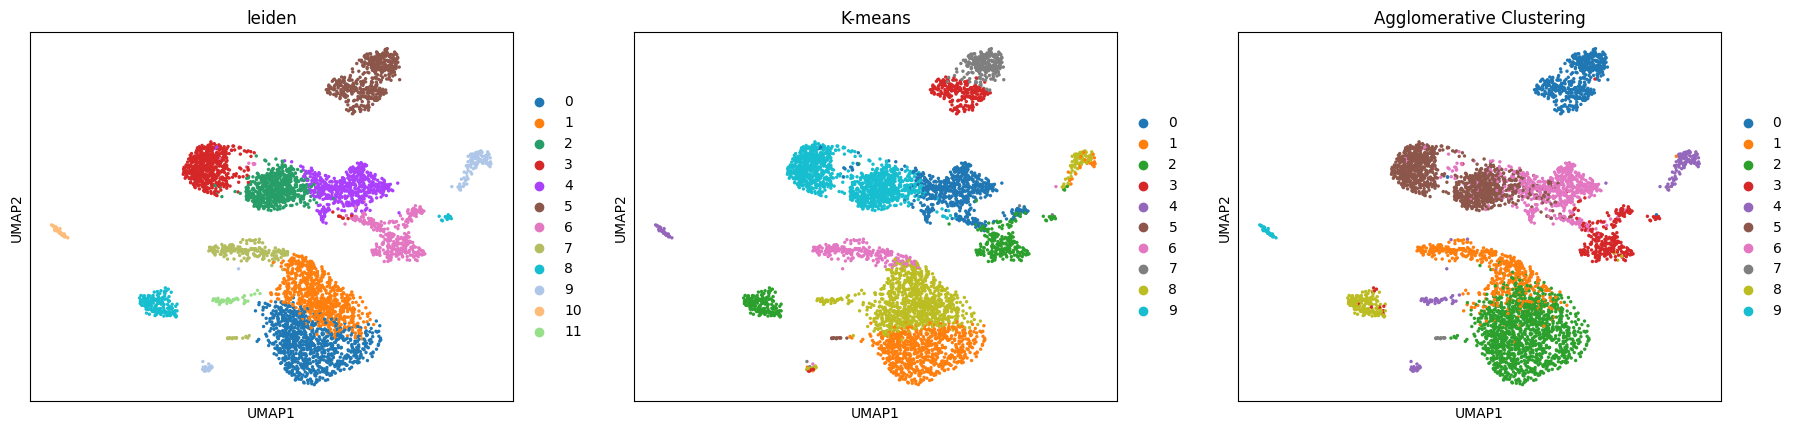

In [277]:
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

# leiden (целых 12 кластеров) как мне кажется справился лучше всех, далее K-means и последний это Aggl.cl

# Теперь потюним параметры:

In [278]:
# Мне кажется что нужно понизить чутка количетсов искомых кластеров, потому что на картинке выше какие то из кластеров сильно перекрываются у этих алгоритмов, мб 8 кластеров будут более четкие
algorithms = [
    ("K-means", KMeans(n_clusters=8, random_state=12)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=8)),
]
for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agglomerative Clustering


In [279]:
# Лейден отработал как мне кажется почти идеально, но резолюшин я бы чутка снизил бы что бы глянуть мб границы станут четче (за счет уменьшения количества кластеров)
sc.tl.leiden(sample, resolution=0.4)

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


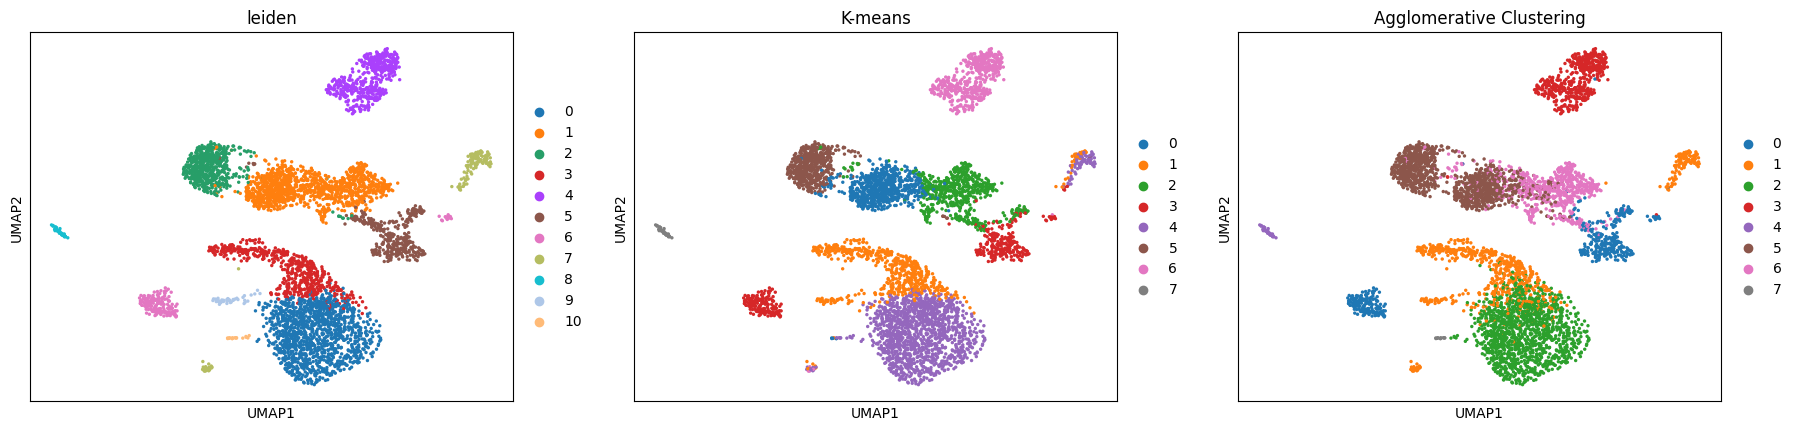

In [280]:
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

# K-means стал получше мне кажется, а вот Aggl.cl хуже
# Leiden не понятно, я бы оставил бы старое значение

# Мне кажется что 8 кластеров выглядят достаточно убедительно

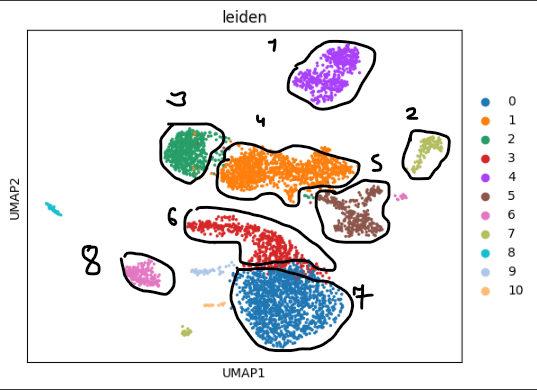![image.png]()

# C другой стороны можно было бы и так разделить их на 9 кластеров

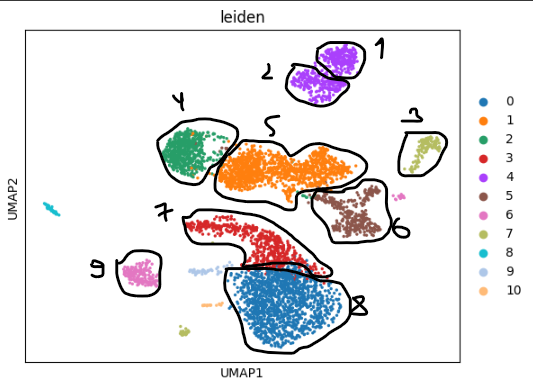

# Если сильно искать то можно даже 19 найти и более. Попробуем настроить K-means и aggl.cl на 19 кластеров а y leiden повысить resolution, может они найдутся?

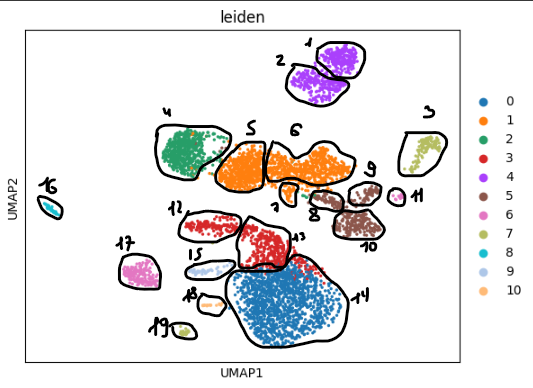

In [281]:
algorithms = [
    ("K-means", KMeans(n_clusters=19, random_state=12)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=19)),
]
for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agglomerative Clustering


In [282]:
sc.tl.leiden(sample, resolution=0.9)

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


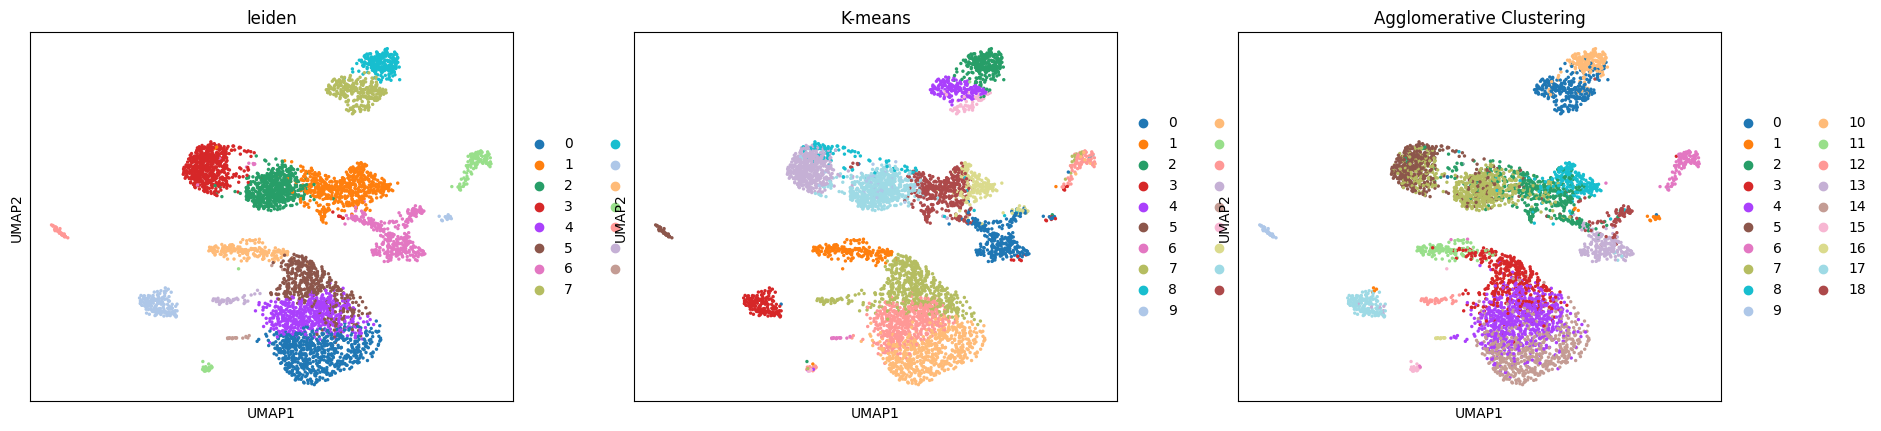

In [283]:
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

# aggl.clus сошел с ума, что следовало ожидать, K-means тоже, но не так сильно. Лейден выглядит как всегда приличней всех

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


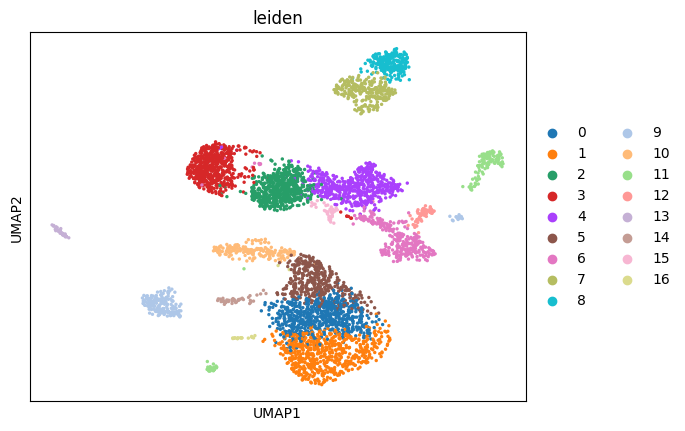

In [284]:
sc.tl.leiden(sample, resolution=1)
sc.pl.umap(
    sample,
    color=['leiden']
)

# ХМ, очень сложно выбирать, но лейден с резолюшн 1 дает ровно 17 кластеров, причем они +- прилично разделены. Но видно что все таки перебор, щас покажу где:

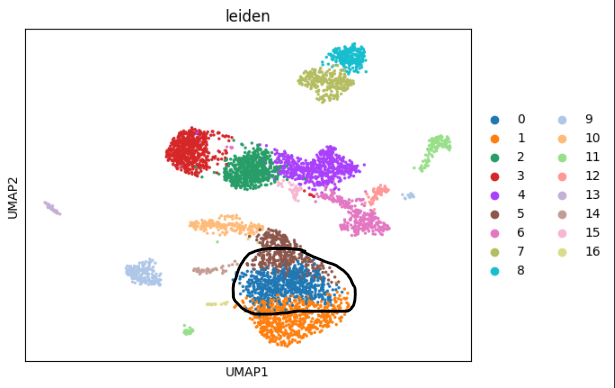

# Но мне очень понравилось что разделилось тут:

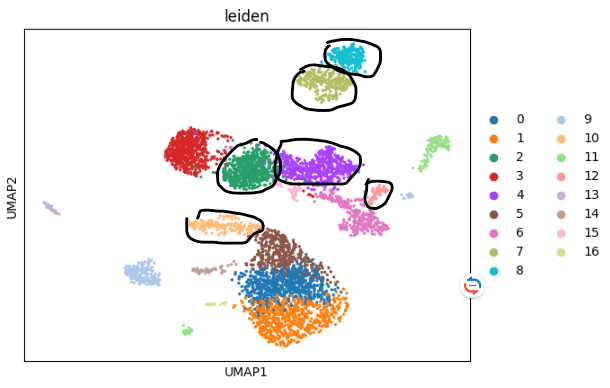

# Продолжаем поиски (резолюшин более 1 точно уже будет слишком большим значением, следовательно более 17 кластеров точно уже перебор (да и 17 перебор))

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


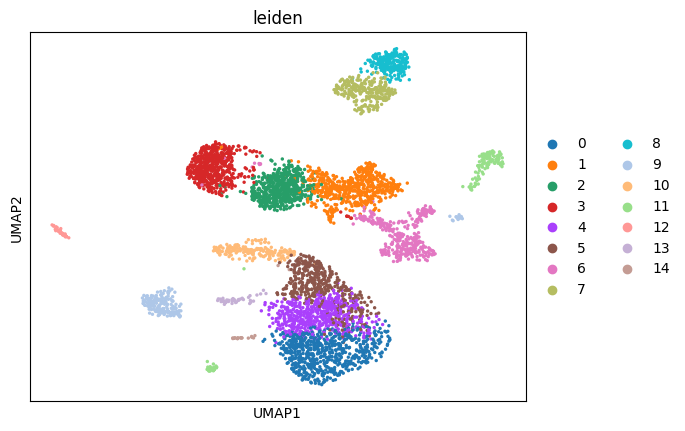

In [287]:
sc.tl.leiden(sample, resolution=0.9)
sc.pl.umap(
    sample,
    color=['leiden']
)

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


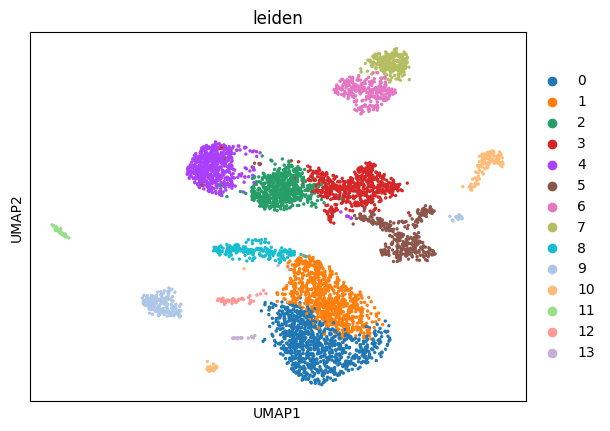

In [288]:
sc.tl.leiden(sample, resolution=0.8)
sc.pl.umap(
    sample,
    color=['leiden']
)

# Мы приближаемся к идеалу, но мне все еще не нравится что эти две группки (будто бы какие то погрешности, выделяются в отдельные кластеры), но походу с этим ниче не поделаешь, они выделяются даже когда кластеров меньше:

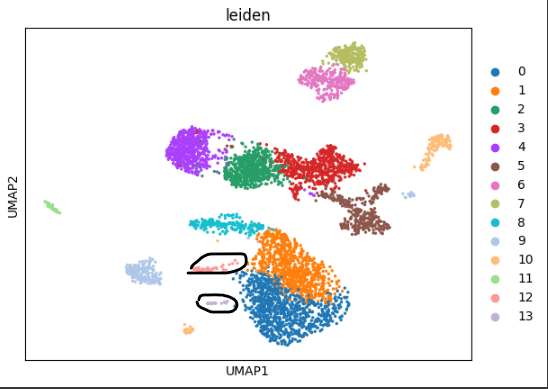

# Таким образом я считаю что идеально количество кластеров это 11 (если убрать эти два артефакта и другие мелкие подгруппки, которые скорее выглядят как погрешности чем кластера) Попробуем K-means / aggl.cl на 11 настроить:

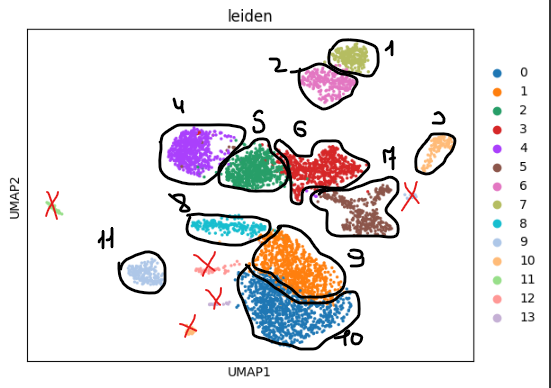

In [289]:
algorithms = [
    ("K-means", KMeans(n_clusters=11, random_state=12)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=11)),
]
for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agglomerative Clustering


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


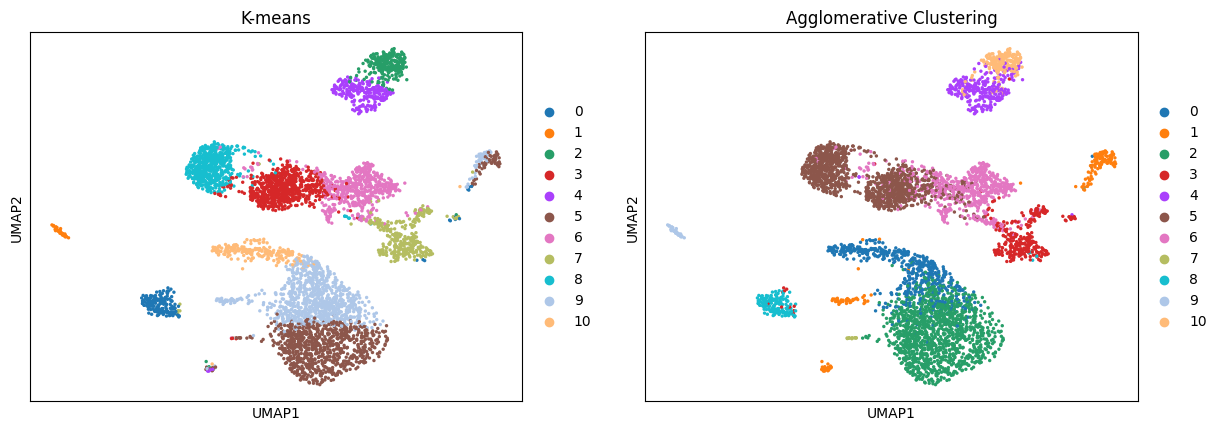

In [290]:
sc.pl.umap(
    sample,
    color=['K-means', 'Agglomerative Clustering']
)

# aggl.cl как всегда в пролете, K-means лучше, но лейден топ

# Лучше всех помоему кластеризует этот вариант:

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


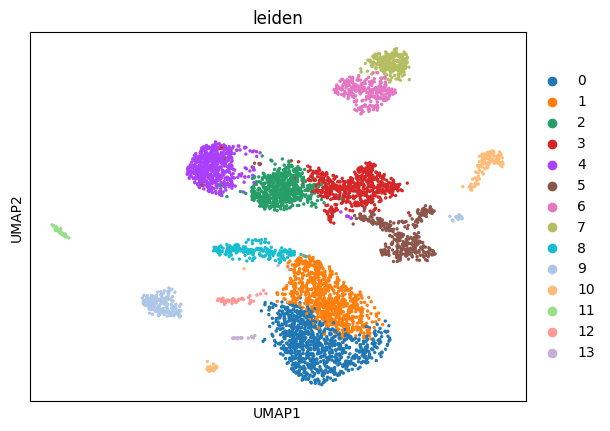

In [298]:
sc.tl.leiden(sample, resolution=0.8)
sc.pl.umap(
    sample,
    color=['leiden']
)

[1] Analyze your clusters and identify if any of them is an outlier in terms of technical scRNA characteristics, such as: number of genes per cell, percentage of mitochondrial expression. Make relevant visualizations.

# Прям серьезных выбросов я не вижу

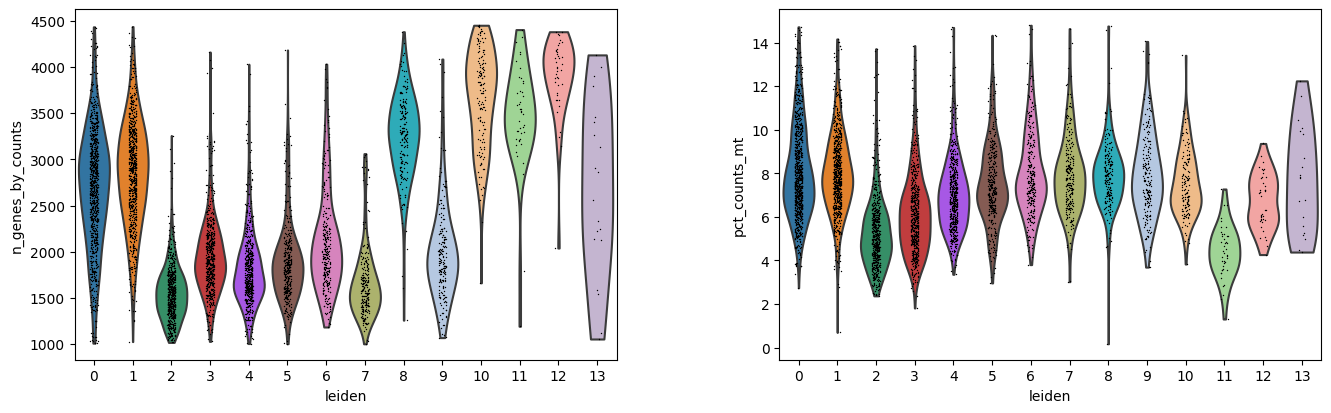

In [299]:
sc.pl.violin(sample, keys=['n_genes_by_counts', 'pct_counts_mt'], groupby='leiden')

In [300]:
# Ранжирование генов для каждого кластера
sc.tl.rank_genes_groups(sample, 'leiden', method='wilcoxon', use_raw=False, key_added='rank_genes_leiden') # у нас данные не сырые, так что use_raw = False (это по умолчанию, но я явно указал)

ranking genes
    finished: added to `.uns['rank_genes_leiden']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: 

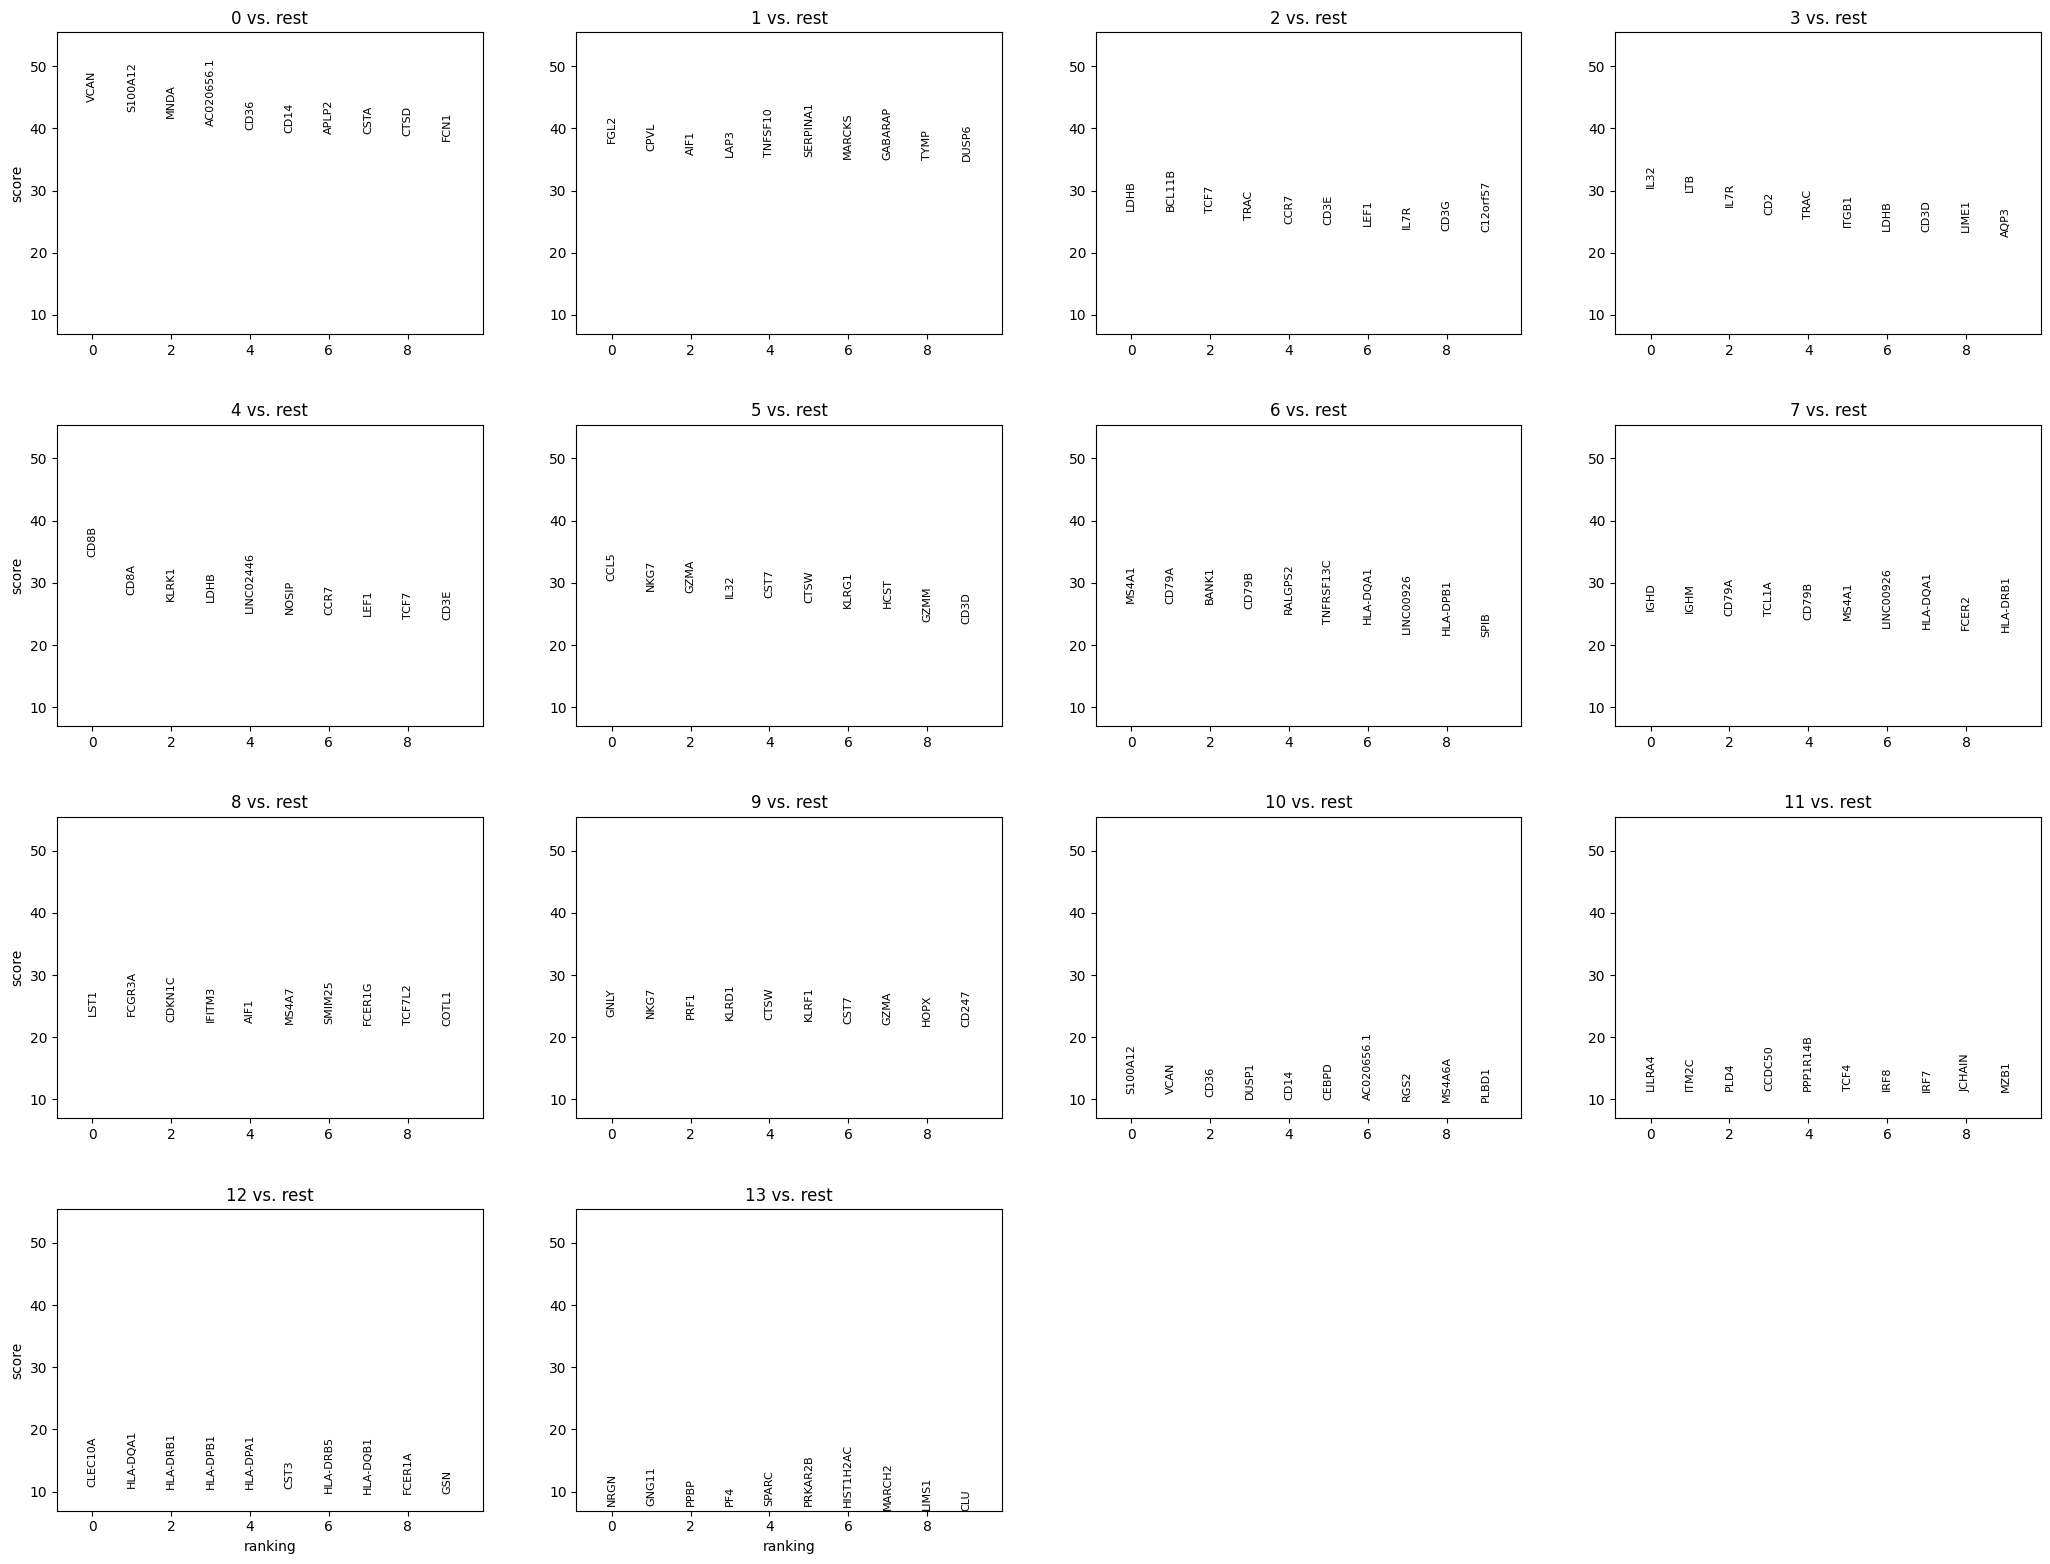

In [304]:
# Plot the ranking of genes for each cluster
sc.pl.rank_genes_groups(sample, key='rank_genes_leiden', n_genes=10)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


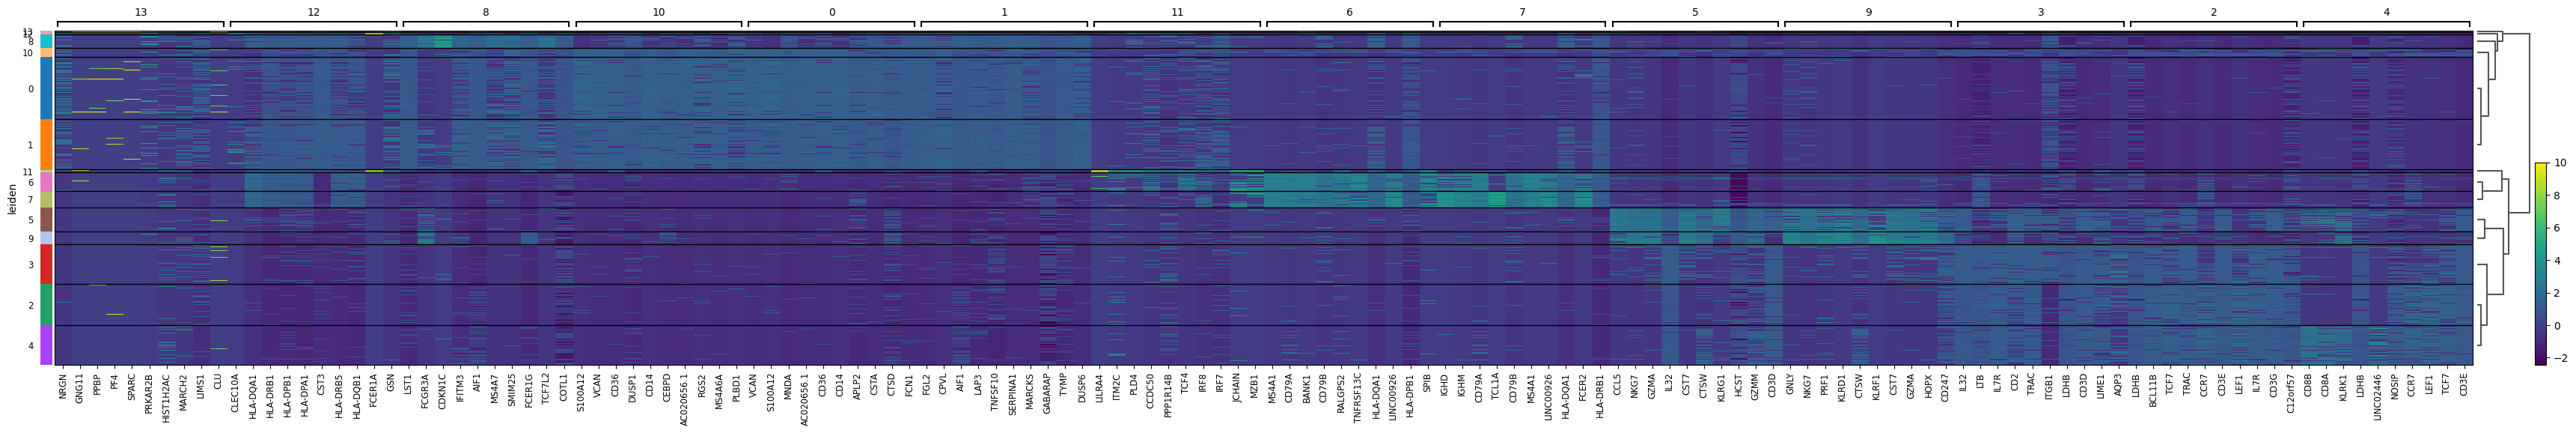

In [302]:
# Визуализация топ-10 генов для каждого кластера
sc.pl.rank_genes_groups_heatmap(
    sample,
    key='rank_genes_leiden',
    n_genes=10,
    use_raw=False,
    groupby='leiden',
    cmap='viridis',  # это цветовая схема
    show_gene_labels=True,
)
# Да: интепретировать это нереально

In [301]:
# Получение информации о ранжированных генах
result = sample.uns['rank_genes_leiden']

# Получение и вывод списка топ-10 генов для каждого кластера
for cluster_id in result['names'].dtype.names:
    top_genes = result['names'][cluster_id][:10]
    print(f"Cluster {int(cluster_id)+1}: {top_genes}")


Cluster 1: ['VCAN' 'S100A12' 'MNDA' 'AC020656.1' 'CD36' 'CD14' 'APLP2' 'CSTA' 'CTSD'
 'FCN1']
Cluster 2: ['FGL2' 'CPVL' 'AIF1' 'LAP3' 'TNFSF10' 'SERPINA1' 'MARCKS' 'GABARAP'
 'TYMP' 'DUSP6']
Cluster 3: ['LDHB' 'BCL11B' 'TCF7' 'TRAC' 'CCR7' 'CD3E' 'LEF1' 'IL7R' 'CD3G'
 'C12orf57']
Cluster 4: ['IL32' 'LTB' 'IL7R' 'CD2' 'TRAC' 'ITGB1' 'LDHB' 'CD3D' 'LIME1' 'AQP3']
Cluster 5: ['CD8B' 'CD8A' 'KLRK1' 'LDHB' 'LINC02446' 'NOSIP' 'CCR7' 'LEF1' 'TCF7'
 'CD3E']
Cluster 6: ['CCL5' 'NKG7' 'GZMA' 'IL32' 'CST7' 'CTSW' 'KLRG1' 'HCST' 'GZMM' 'CD3D']
Cluster 7: ['MS4A1' 'CD79A' 'BANK1' 'CD79B' 'RALGPS2' 'TNFRSF13C' 'HLA-DQA1'
 'LINC00926' 'HLA-DPB1' 'SPIB']
Cluster 8: ['IGHD' 'IGHM' 'CD79A' 'TCL1A' 'CD79B' 'MS4A1' 'LINC00926' 'HLA-DQA1'
 'FCER2' 'HLA-DRB1']
Cluster 9: ['LST1' 'FCGR3A' 'CDKN1C' 'IFITM3' 'AIF1' 'MS4A7' 'SMIM25' 'FCER1G'
 'TCF7L2' 'COTL1']
Cluster 10: ['GNLY' 'NKG7' 'PRF1' 'KLRD1' 'CTSW' 'KLRF1' 'CST7' 'GZMA' 'HOPX' 'CD247']
Cluster 11: ['S100A12' 'VCAN' 'CD36' 'DUSP1' 'CD14' 'CEBPD' 'AC02

# Попробуем разные типы визуализации из туториала:

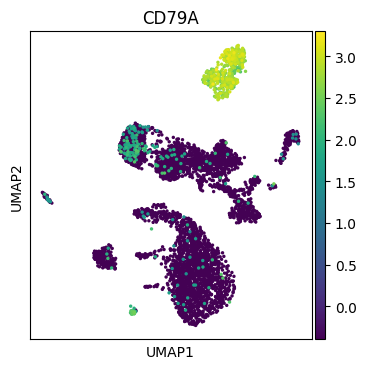

In [306]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(sample, color='CD79A')

In [308]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(sample, key_added='clusters', resolution=0.8)

running Leiden clustering
    finished: found 14 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:03)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


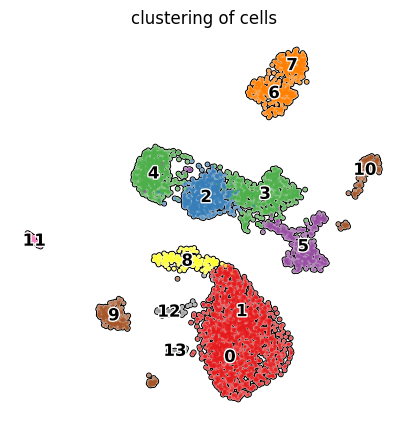

In [309]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(sample, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

* [1.5] Do one of the following:
  * Either provide formal algorithm and implementation of K-means with random initialization by hand, describe results, and compare them to the sklearn implementation.
  * Or do the same for PCA.\
    *Note that completing both assignments does NOT result in [3.0] points.*

In [312]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# так ну я решил РСА реализовать (через собственные вектора ковариационной матрицы, как на паре обсуждали: возьмем два собственных вектора с самыми большими собственными значениями):
def my_pca_implementation(X, n_components=2):
    # центрируем данные для начала:
    X_centered = X - np.mean(X, axis=0)

    # вычисление ковариационной матрицы:
    cov_matrix = np.cov(X_centered, rowvar=False)

    # ычисление собственных значений и векторов
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # сортировка собственных значений чтоб взять два (ну или более) самый вкусных вектора
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # выбор компонент
    selected_eigenvectors = eigenvectors[:, :n_components]

    # проекция
    X_pca = np.dot(X_centered, selected_eigenvectors)

    return X_pca

In [313]:
# генерим случайные данные
np.random.seed(42)
X_random = np.random.rand(100, 5)

# Применяю мою реализацию PCA с 2 компонентами
n_components = 2
X_pca_custom = my_pca_implementation(X_random, n_components)

# Теперь используем PCA из библиотеки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_random)
pca_sklearn = PCA(n_components=n_components)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)

# Сравниваем
print("Custom PCA Result:")
print(X_pca_custom)

print("\nScikit-learn PCA Result:")
print(X_pca_sklearn)


Custom PCA Result:
[[ 4.61038315e-01 -2.80316984e-02]
 [-2.92814049e-02 -4.45074851e-01]
 [ 8.27392853e-01 -1.39944786e-01]
 [ 1.59267192e-01 -1.26940346e-02]
 [-2.49546952e-01  2.24384285e-01]
 [-1.13328206e-01  4.44386117e-01]
 [-8.18510370e-01 -2.59569357e-01]
 [-4.84410755e-01  2.71679268e-01]
 [-1.63016179e-01 -5.84386124e-02]
 [-4.59384420e-02  2.81080184e-01]
 [-8.74412241e-02 -1.51597677e-01]
 [-2.51276783e-01  6.28898631e-01]
 [ 2.43298362e-01  3.99787855e-02]
 [-6.83142637e-02 -2.39184899e-01]
 [-7.34224788e-01  6.77634858e-02]
 [ 3.48103109e-02  5.05385740e-01]
 [ 8.31961909e-02  4.84062208e-01]
 [ 7.16377470e-02 -3.10055369e-01]
 [ 2.27907990e-01 -5.52078418e-01]
 [ 3.41359272e-01  4.20250019e-01]
 [-2.15318814e-02 -5.24493104e-01]
 [ 4.73640630e-01  1.52096435e-01]
 [-6.72128137e-02 -4.26231148e-01]
 [-3.72294319e-01  6.94280789e-02]
 [ 2.40579839e-01  4.61392885e-01]
 [ 5.52623921e-01 -6.37736478e-02]
 [-4.07378887e-01 -1.62875743e-01]
 [ 2.76542618e-02 -4.67342090e-01]
 

# получилось ппц по разному ахахаха =*)

# Extra points [1.5]



* [1] Choose 3 clusters of interest and try to make a guess about their cell type based on the top-expressed genes. For example, look for information on whether such high expression of a certain gene is typical of some cell type.

* [0.5]  You worked hard to get here, and we hope you learned something new! To get these bonus points, please describe your impressions of this course, constructive suggestions, and attach a funny meme (about your favourite field, like ML or molecular biology) \
 **Please note that if the meme is not funny, no points will be awarded!**

# Так ну кластер 5 похоже на Т-киллеры или цитотоксический Т лимфоциты. Тут целых три гена у них высокоэкспрессируются которые типичны именно этой линии клеток (CD8 А и В и KLRK1), эти клетки еще называют CD8+

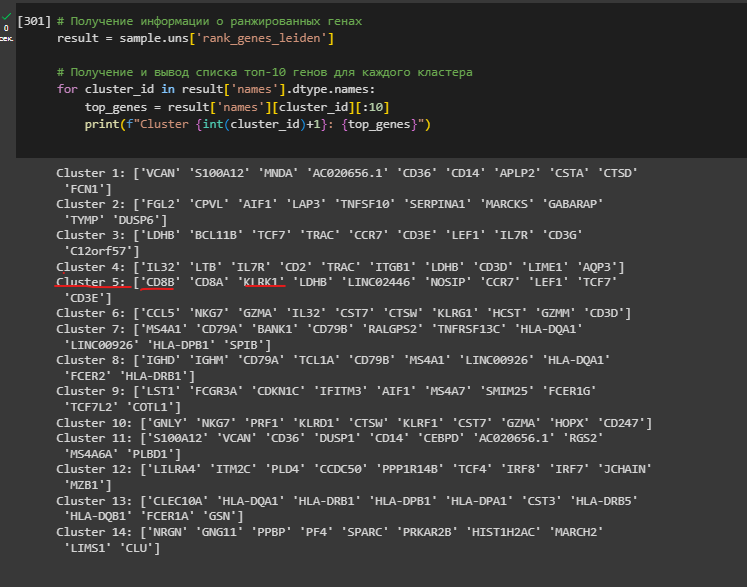

# Толи 6 толи 10 кластер поход на натуральных киллеров (NK-клетки), тут видно что у этих кластеров высокоэкспрессируется генетический паттерн NK клеток NKG7, IL32 (интерлейкин 32 - хемокин), KLRG1 - ген отвечающий за агрессию и цитотоксичность, CD группа - типичный поверхностный белок лимфоцитов

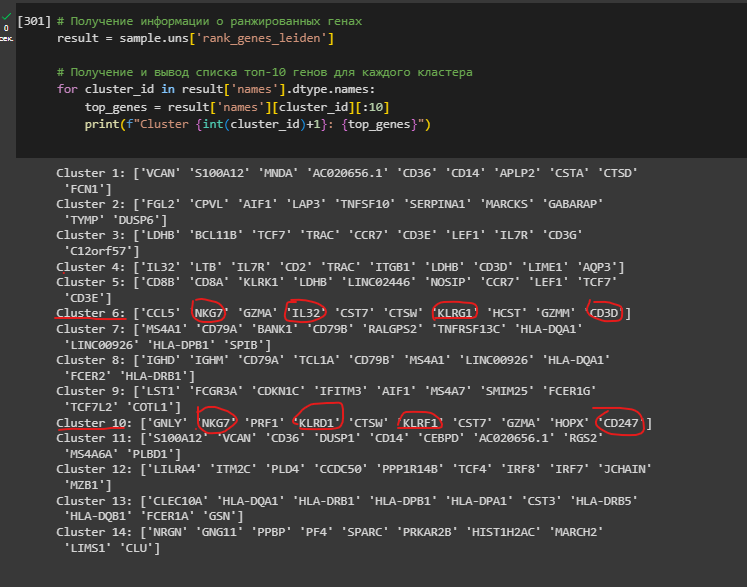

# CLEC10A - специфический маркер дендритных клеток

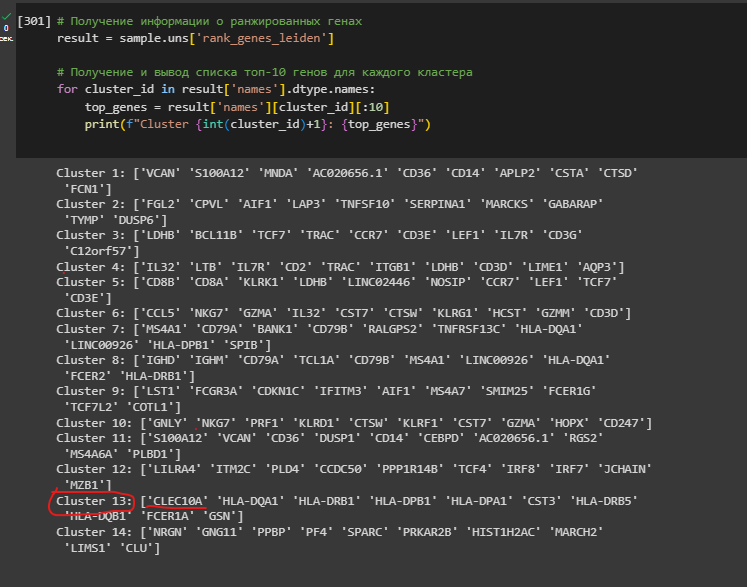

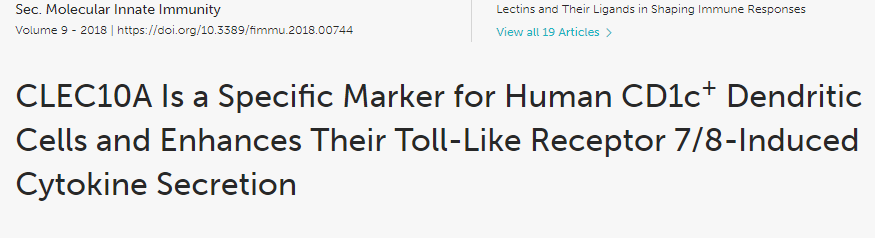

Так ну что касается курса, то он просто топ, честное слово. Я невероятно много узнал как о биологии так и о машинном обучении благодаря этому курсу. В том числе это домашка показалась мне очень увлекательной и интересной, жалко было времени мало и мало сна что бы сделать ее еще более качественно( Но угадывать клетки по экспрессии генов оч крутое доп задание, класс. круто то что МО мы применяли относительно крутых биологических данных, учились искать их, качать чипсеки всякие и шарить по базам данных. Очень высоко оцениваю так же вопросы, казалось бы это МО, но вопросы были биологические и приходилось порой думать как правильно ответить. Отдельно еще хочу ответить очень крутой момент в домашке номер 2 где нужно было фича импортанс оценить, и понять какие факторы сильнее всех влияют на уровень холестерина, оч крутой короче, спасибо вам большое за курс! Отдельная благодарность Марии Сергеевной за очень увлекательные и интересные лекции и тебе Кирилл за терпение и увлеченность преподавательским процессом, ценю!

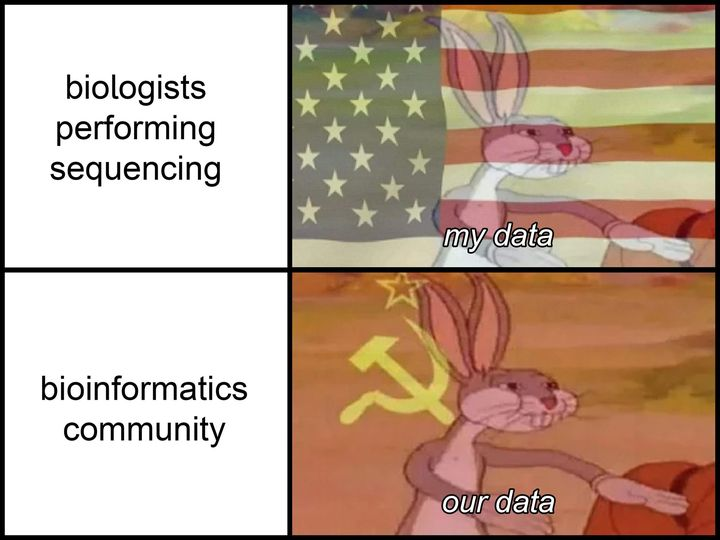